# Prediction of Movie Genres from the Movie Plots

The data we used are from Kaggle and it contains the relevant details of the movies including the overview of the movie which is the plot of the movie. 

The dataset contains 4803 movies and the informations found are as below:

    1. Budget: Money spent on the movie
    2. Genres: Genres of the movie
    3. Homepage: Original website of the movie
    4. id: Unique ID given to the movie
    5. Keywords: Special words in the overview
    6. Original language: Language of the movie
    7. Original title: Title of the movie
    8. Overview: Summary and plot of the movie
    9. Popularity: Popularity scores of the movies
    10. Production companies: Name of production company
    11. Production countries: Country of the production
    12. Release Date: Date of movie release
    13. Revenue: Money earned from the movie
    14. Runtime: Duration of the movie in minutes
    15. Spoken language: Language spoken in the movie
    16. Status: The movie status
    17. Tagline: A short sentence describing the movie
    18. Title: Title of the movie
    19. Vote average: Average votes of the movie (Max limit of 10)
    20. Vote count: Number of voters

## Import necessary libraries and packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt 
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
from nltk.stem import WordNetLemmatizer

## Import dataset to pandas from csv file

In [2]:
movies = pd.read_csv("tmdb_5000_movies.csv")
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"{id: 28, name: Action}, {id: 12, name: Adventu...",http://www.avatarmovie.com/,19995,"{id: 1463, name: culture clash}, {id: 2964, na...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"{name: Ingenious Film Partners, id: 289}, {nam...","{iso_3166_1: US, name: United States of Americ...",10/12/2009,2787965087,162.0,"{iso_639_1: en, name: English}, {iso_639_1: es...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"{id: 12, name: Adventure}, {id: 14, name: Fant...",http://disney.go.com/disneypictures/pirates/,285,"{id: 270, name: ocean}, {id: 726, name: drug a...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"{name: Walt Disney Pictures, id: 2}, {name: Je...","{iso_3166_1: US, name: United States of America}",19/5/2007,961000000,169.0,"{iso_639_1: en, name: English}",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"{id: 28, name: Action}, {id: 12, name: Adventu...",http://www.sonypictures.com/movies/spectre/,206647,"{id: 470, name: spy}, {id: 818, name: based on...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"{name: Columbia Pictures, id: 5}, {name: Danja...","{iso_3166_1: GB, name: United Kingdom}, {iso_3...",26/10/2015,880674609,148.0,"{iso_639_1: fr, name: Fran\u00e7ais}, {iso_639...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"{id: 28, name: Action}, {id: 80, name: Crime},...",http://www.thedarkknightrises.com/,49026,"{id: 849, name: dc comics}, {id: 853, name: cr...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"{name: Legendary Pictures, id: 923}, {name: Wa...","{iso_3166_1: US, name: United States of America}",16/7/2012,1084939099,165.0,"{iso_639_1: en, name: English}",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"{id: 28, name: Action}, {id: 12, name: Adventu...",http://movies.disney.com/john-carter,49529,"{id: 818, name: based on novel}, {id: 839, nam...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"{name: Walt Disney Pictures, id: 2}","{iso_3166_1: US, name: United States of America}",7/3/2012,284139100,132.0,"{iso_639_1: en, name: English}",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
movies.shape

(4803, 20)

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4775 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4391 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4452 non-null   object 
 10  production_countries  4629 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4717 non-null   object 
 15  status               

In [5]:
movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

## Data Cleaning

For the data cleaning part, we only clean the column of `genres` and `overview` as both of the columns will be mainly used for Machine Learning part.

### Cleaning of the genres column

`genres` column is much harder to clean as it consists of a few dictionaries. In fact, we use the `str.split()` method to split them off by the delimiters.

In [6]:
movies_genres = pd.DataFrame(movies['genres'])
movies_genres.head()

,genres
0,"{id: 28, name: Action}, {id: 12, name: Adventu..."
1,"{id: 12, name: Adventure}, {id: 14, name: Fant..."
2,"{id: 28, name: Action}, {id: 12, name: Adventu..."
3,"{id: 28, name: Action}, {id: 80, name: Crime},..."
4,"{id: 28, name: Action}, {id: 12, name: Adventu..."


In [7]:
movies_genres = movies['genres'].str.split(",",expand = True)
movies_genres

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,{id: 28,name: Action},{id: 12,name: Adventure},{id: 14,name: Fantasy},{id: 878,name: Science Fiction},None,None,None,None,None,None
1,{id: 12,name: Adventure},{id: 14,name: Fantasy},{id: 28,name: Action},None,None,None,None,None,None,None,None
2,{id: 28,name: Action},{id: 12,name: Adventure},{id: 80,name: Crime},None,None,None,None,None,None,None,None
3,{id: 28,name: Action},{id: 80,name: Crime},{id: 18,name: Drama},{id: 53,name: Thriller},None,None,None,None,None,None
4,{id: 28,name: Action},{id: 12,name: Adventure},{id: 878,name: Science Fiction},None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,{id: 28,name: Action},{id: 80,name: Crime},{id: 53,name: Thriller},None,None,None,None,None,None,None,None
4799,{id: 35,name: Comedy},{id: 10749,name: Romance},None,None,None,None,None,None,None,None,None,None
4800,{id: 35,name: Comedy},{id: 18,name: Drama},{id: 10749,name: Romance},{id: 10770,name: TV Movie},None,None,None,None,None,None
4801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since each of the movies has a lot of genres, therefore it is hard to analyse the so many genres only based on one story overview. In fact, since the genres are not arranged in the form of alphabetical order or the order of id, hence there is definitely a reason for arrange it in this order. Therefore, we only take the **first genre** for analysis. 

In [8]:
movies_genres = movies_genres[1].str.split(":",expand = True)
movies_genres

,0,1
0,name,Action}
1,name,Adventure}
2,name,Action}
3,name,Action}
4,name,Action}
...,...,...
4798,name,Action}
4799,name,Comedy}
4800,name,Comedy}
4801,NaN,NaN


In [9]:
movies_genres = movies_genres[1].str.split("}",expand = True)
movies_genres

,0,1
0,Action,
1,Adventure,
2,Action,
3,Action,
4,Action,
...,...,...
4798,Action,
4799,Comedy,
4800,Comedy,
4801,NaN,NaN


In [10]:
movies_genres.rename(columns = {0:'Main_genres'})

,Main_genres,1
0,Action,
1,Adventure,
2,Action,
3,Action,
4,Action,
...,...,...
4798,Action,
4799,Comedy,
4800,Comedy,
4801,NaN,NaN


We concatenate the cleaned genres into the main movies dataset.

In [11]:
movies_clean = pd.concat([movies,movies_genres],axis=1)
movies_clean

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,0,1
0,237000000,"{id: 28, name: Action}, {id: 12, name: Adventu...",http://www.avatarmovie.com/,19995,"{id: 1463, name: culture clash}, {id: 2964, na...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"{name: Ingenious Film Partners, id: 289}, {nam...",...,2787965087,162.0,"{iso_639_1: en, name: English}, {iso_639_1: es...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action,
1,300000000,"{id: 12, name: Adventure}, {id: 14, name: Fant...",http://disney.go.com/disneypictures/pirates/,285,"{id: 270, name: ocean}, {id: 726, name: drug a...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"{name: Walt Disney Pictures, id: 2}, {name: Je...",...,961000000,169.0,"{iso_639_1: en, name: English}",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure,
2,245000000,"{id: 28, name: Action}, {id: 12, name: Adventu...",http://www.sonypictures.com/movies/spectre/,206647,"{id: 470, name: spy}, {id: 818, name: based on...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"{name: Columbia Pictures, id: 5}, {name: Danja...",...,880674609,148.0,"{iso_639_1: fr, name: Fran\u00e7ais}, {iso_639...",Released,A Plan No One Escapes,Spectre,6.3,4466,Action,
3,250000000,"{id: 28, name: Action}, {id: 80, name: Crime},...",http://www.thedarkknightrises.com/,49026,"{id: 849, name: dc comics}, {id: 853, name: cr...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"{name: Legendary Pictures, id: 923}, {name: Wa...",...,1084939099,165.0,"{iso_639_1: en, name: English}",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Action,
4,260000000,"{id: 28, name: Action}, {id: 12, name: Adventu...",http://movies.disney.com/john-carter,49529,"{id: 818, name: based on novel}, {id: 839, nam...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"{name: Walt Disney Pictures, id: 2}",...,284139100,132.0,"{iso_639_1: en, name: English}",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Action,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"{id: 28, name: Action}, {id: 80, name: Crime},...",NaN,9367,"{id: 5616, name: united states\u2013mexico bar...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"{name: Columbia Pictures, id: 5}",...,2040920,81.0,"{iso_639_1: es, name: Espa\u00f1ol}",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Action,
4799,9000,"{id: 35, name: Comedy}, {id: 10749, name: Roma...",NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,NaN,...,0,85.0,NaN,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Comedy,
4800,0,"{id: 35, name: Comedy}, {id: 18, name: Drama},...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"{id: 248, name: date}, {id: 699, name: love at...",en,"Signed, Sealed, Delivered","Signed, Sealed, Delivered introduces a dedicat...",1.444476,"{name: Front Street Pictures, id: 3958}, {name...",...,0,120.0,"{iso_639_1: en, name: English}",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Comedy,
4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,NaN,...,0,98.0,"{iso_639_1: en, name: English}",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,NaN,NaN


In [12]:
movies_clean.rename(columns={0:'First_genre',1:'Empty'},inplace=True)
movies_clean

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,First_genre,Empty
0,237000000,"{id: 28, name: Action}, {id: 12, name: Adventu...",http://www.avatarmovie.com/,19995,"{id: 1463, name: culture clash}, {id: 2964, na...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"{name: Ingenious Film Partners, id: 289}, {nam...",...,2787965087,162.0,"{iso_639_1: en, name: English}, {iso_639_1: es...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action,
1,300000000,"{id: 12, name: Adventure}, {id: 14, name: Fant...",http://disney.go.com/disneypictures/pirates/,285,"{id: 270, name: ocean}, {id: 726, name: drug a...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"{name: Walt Disney Pictures, id: 2}, {name: Je...",...,961000000,169.0,"{iso_639_1: en, name: English}",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure,
2,245000000,"{id: 28, name: Action}, {id: 12, name: Adventu...",http://www.sonypictures.com/movies/spectre/,206647,"{id: 470, name: spy}, {id: 818, name: based on...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"{name: Columbia Pictures, id: 5}, {name: Danja...",...,880674609,148.0,"{iso_639_1: fr, name: Fran\u00e7ais}, {iso_639...",Released,A Plan No One Escapes,Spectre,6.3,4466,Action,
3,250000000,"{id: 28, name: Action}, {id: 80, name: Crime},...",http://www.thedarkknightrises.com/,49026,"{id: 849, name: dc comics}, {id: 853, name: cr...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"{name: Legendary Pictures, id: 923}, {name: Wa...",...,1084939099,165.0,"{iso_639_1: en, name: English}",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Action,
4,260000000,"{id: 28, name: Action}, {id: 12, name: Adventu...",http://movies.disney.com/john-carter,49529,"{id: 818, name: based on novel}, {id: 839, nam...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"{name: Walt Disney Pictures, id: 2}",...,284139100,132.0,"{iso_639_1: en, name: English}",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Action,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"{id: 28, name: Action}, {id: 80, name: Crime},...",NaN,9367,"{id: 5616, name: united states\u2013mexico bar...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"{name: Columbia Pictures, id: 5}",...,2040920,81.0,"{iso_639_1: es, name: Espa\u00f1ol}",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Action,
4799,9000,"{id: 35, name: Comedy}, {id: 10749, name: Roma...",NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,NaN,...,0,85.0,NaN,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Comedy,
4800,0,"{id: 35, name: Comedy}, {id: 18, name: Drama},...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"{id: 248, name: date}, {id: 699, name: love at...",en,"Signed, Sealed, Delivered","Signed, Sealed, Delivered introduces a dedicat...",1.444476,"{name: Front Street Pictures, id: 3958}, {name...",...,0,120.0,"{iso_639_1: en, name: English}",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Comedy,
4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,NaN,...,0,98.0,"{iso_639_1: en, name: English}",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,NaN,NaN


In [13]:
movies_clean = movies_clean.drop(['genres','Empty'],axis=1)
movies_clean

,budget,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,First_genre
0,237000000,http://www.avatarmovie.com/,19995,"{id: 1463, name: culture clash}, {id: 2964, na...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"{name: Ingenious Film Partners, id: 289}, {nam...","{iso_3166_1: US, name: United States of Americ...",10/12/2009,2787965087,162.0,"{iso_639_1: en, name: English}, {iso_639_1: es...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action
1,300000000,http://disney.go.com/disneypictures/pirates/,285,"{id: 270, name: ocean}, {id: 726, name: drug a...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"{name: Walt Disney Pictures, id: 2}, {name: Je...","{iso_3166_1: US, name: United States of America}",19/5/2007,961000000,169.0,"{iso_639_1: en, name: English}",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,"{id: 470, name: spy}, {id: 818, name: based on...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"{name: Columbia Pictures, id: 5}, {name: Danja...","{iso_3166_1: GB, name: United Kingdom}, {iso_3...",26/10/2015,880674609,148.0,"{iso_639_1: fr, name: Fran\u00e7ais}, {iso_639...",Released,A Plan No One Escapes,Spectre,6.3,4466,Action
3,250000000,http://www.thedarkknightrises.com/,49026,"{id: 849, name: dc comics}, {id: 853, name: cr...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"{name: Legendary Pictures, id: 923}, {name: Wa...","{iso_3166_1: US, name: United States of America}",16/7/2012,1084939099,165.0,"{iso_639_1: en, name: English}",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Action
4,260000000,http://movies.disney.com/john-carter,49529,"{id: 818, name: based on novel}, {id: 839, nam...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"{name: Walt Disney Pictures, id: 2}","{iso_3166_1: US, name: United States of America}",7/3/2012,284139100,132.0,"{iso_639_1: en, name: English}",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,NaN,9367,"{id: 5616, name: united states\u2013mexico bar...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"{name: Columbia Pictures, id: 5}","{iso_3166_1: MX, name: Mexico}, {iso_3166_1: U...",4/9/1992,2040920,81.0,"{iso_639_1: es, name: Espa\u00f1ol}",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Action
4799,9000,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,NaN,NaN,26/12/2011,0,85.0,NaN,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Comedy
4800,0,http://www.hallmarkchannel.com/signedsealeddel...,231617,"{id: 248, name: date}, {id: 699, name: love at...",en,"Signed, Sealed, Delivered","Signed, Sealed, Delivered introduces a dedicat...",1.444476,"{name: Front Street Pictures, id: 3958}, {name...","{iso_3166_1: US, name: United States of America}",13/10/2013,0,120.0,"{iso_639_1: en, name: English}",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Comedy
4801,0,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,NaN,"{iso_3166_1: US, name: United States of Americ...",3/5/2012,0,98.0,"{iso_639_1: en, name: English}",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,NaN


We then remove the entries where the genres are not available.

In [14]:
movies_clean = movies_clean.dropna(subset=['First_genre'])
movies_clean.head()

,budget,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,First_genre
0,237000000,http://www.avatarmovie.com/,19995,"{id: 1463, name: culture clash}, {id: 2964, na...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"{name: Ingenious Film Partners, id: 289}, {nam...","{iso_3166_1: US, name: United States of Americ...",10/12/2009,2787965087,162.0,"{iso_639_1: en, name: English}, {iso_639_1: es...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action
1,300000000,http://disney.go.com/disneypictures/pirates/,285,"{id: 270, name: ocean}, {id: 726, name: drug a...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"{name: Walt Disney Pictures, id: 2}, {name: Je...","{iso_3166_1: US, name: United States of America}",19/5/2007,961000000,169.0,"{iso_639_1: en, name: English}",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,"{id: 470, name: spy}, {id: 818, name: based on...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"{name: Columbia Pictures, id: 5}, {name: Danja...","{iso_3166_1: GB, name: United Kingdom}, {iso_3...",26/10/2015,880674609,148.0,"{iso_639_1: fr, name: Fran\u00e7ais}, {iso_639...",Released,A Plan No One Escapes,Spectre,6.3,4466,Action
3,250000000,http://www.thedarkknightrises.com/,49026,"{id: 849, name: dc comics}, {id: 853, name: cr...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"{name: Legendary Pictures, id: 923}, {name: Wa...","{iso_3166_1: US, name: United States of America}",16/7/2012,1084939099,165.0,"{iso_639_1: en, name: English}",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Action
4,260000000,http://movies.disney.com/john-carter,49529,"{id: 818, name: based on novel}, {id: 839, nam...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"{name: Walt Disney Pictures, id: 2}","{iso_3166_1: US, name: United States of America}",7/3/2012,284139100,132.0,"{iso_639_1: en, name: English}",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Action


In [15]:
movies_clean.shape

(4775, 20)

### Convert the release date to release year

In [16]:
movies_clean['release_year'] = pd.DatetimeIndex(movies_clean['release_date']).year
movies_clean = movies_clean.drop(['release_date'],axis=1)
movies_clean.head()

<ipython-input-16-d657d80d77b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_clean['release_year'] = pd.DatetimeIndex(movies_clean['release_date']).year


,budget,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,First_genre,release_year
0,237000000,http://www.avatarmovie.com/,19995,"{id: 1463, name: culture clash}, {id: 2964, na...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"{name: Ingenious Film Partners, id: 289}, {nam...","{iso_3166_1: US, name: United States of Americ...",2787965087,162.0,"{iso_639_1: en, name: English}, {iso_639_1: es...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action,2009
1,300000000,http://disney.go.com/disneypictures/pirates/,285,"{id: 270, name: ocean}, {id: 726, name: drug a...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"{name: Walt Disney Pictures, id: 2}, {name: Je...","{iso_3166_1: US, name: United States of America}",961000000,169.0,"{iso_639_1: en, name: English}",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure,2007
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,"{id: 470, name: spy}, {id: 818, name: based on...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"{name: Columbia Pictures, id: 5}, {name: Danja...","{iso_3166_1: GB, name: United Kingdom}, {iso_3...",880674609,148.0,"{iso_639_1: fr, name: Fran\u00e7ais}, {iso_639...",Released,A Plan No One Escapes,Spectre,6.3,4466,Action,2015
3,250000000,http://www.thedarkknightrises.com/,49026,"{id: 849, name: dc comics}, {id: 853, name: cr...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"{name: Legendary Pictures, id: 923}, {name: Wa...","{iso_3166_1: US, name: United States of America}",1084939099,165.0,"{iso_639_1: en, name: English}",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Action,2012
4,260000000,http://movies.disney.com/john-carter,49529,"{id: 818, name: based on novel}, {id: 839, nam...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"{name: Walt Disney Pictures, id: 2}","{iso_3166_1: US, name: United States of America}",284139100,132.0,"{iso_639_1: en, name: English}",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Action,2012


## Exploratory Data Analysis (EDA)

### Numerical Data

First of all, let us explore the numerical data.

In [17]:
num_data = movies_clean['vote_average']
num_data.describe()

count    4775.000000
mean        6.114199
std         1.140636
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

<AxesSubplot:>

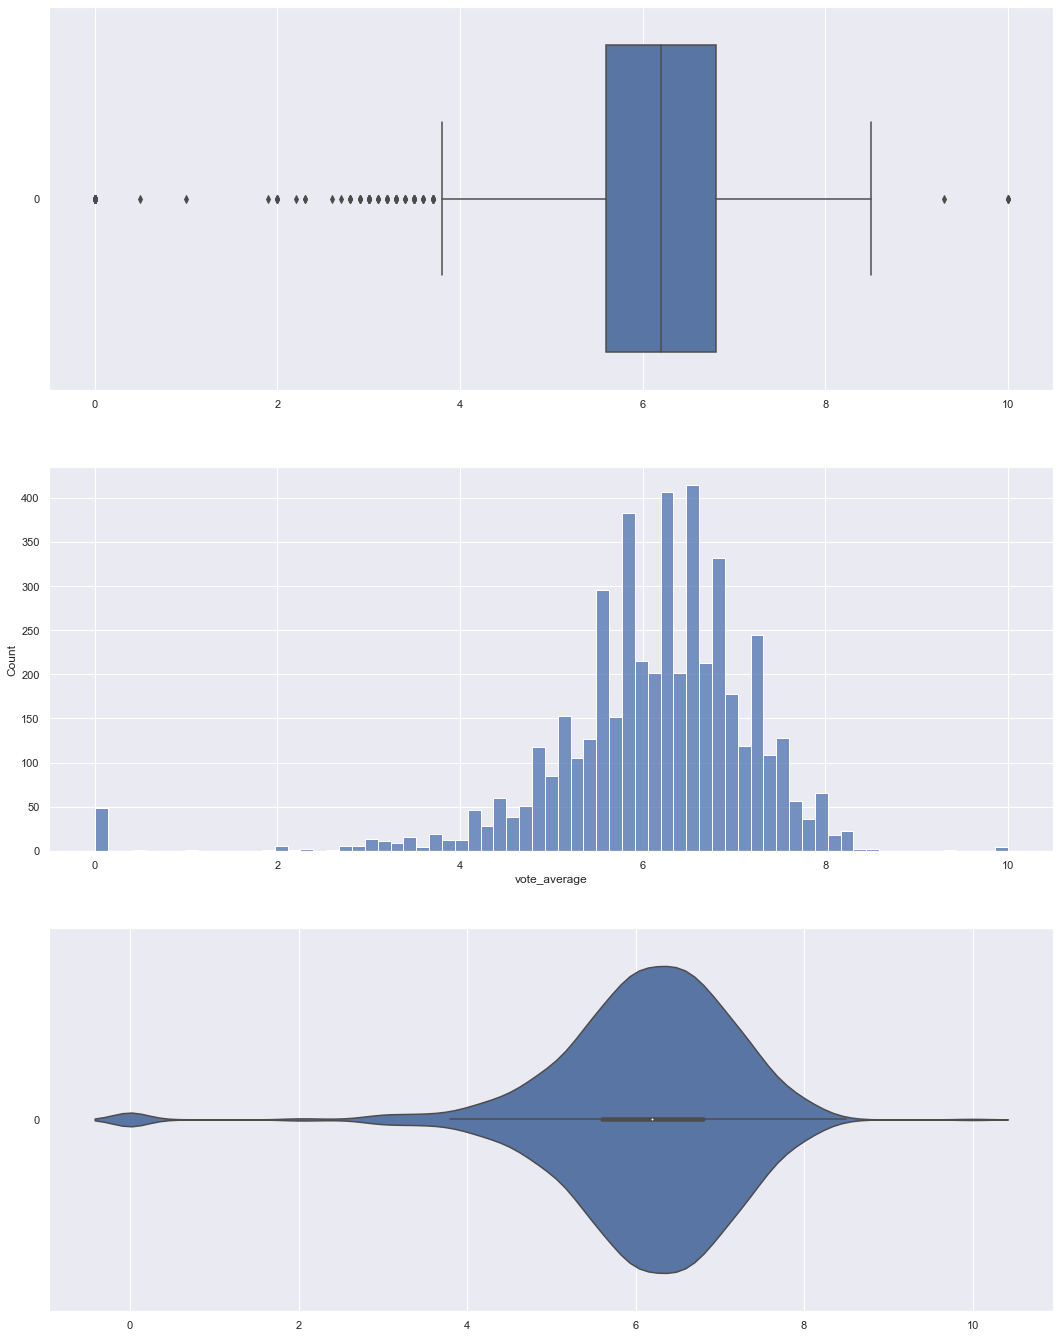

In [18]:
f, axes = plt.subplots(3,figsize=(18, 24))
sb.boxplot(data = num_data, orient = "h", ax = axes[0])
sb.histplot(data = num_data,ax = axes[1])
sb.violinplot(data = num_data, orient = "h", ax = axes[2])

In [19]:
num_data.skew()

-1.8123969688594601

Hence, we can see that the data of vote average is negatively skewed, which means that median is larger than the mean of the data.

Besides, we can observe the **Movie Distribution by Years**.

In [20]:
year = movies_clean['release_year']
year.describe()

count    4775.000000
mean     2002.431623
std        12.427969
min      1916.000000
25%      1999.000000
50%      2005.000000
75%      2011.000000
max      2017.000000
Name: release_year, dtype: float64

<AxesSubplot:xlabel='release_year', ylabel='Count'>

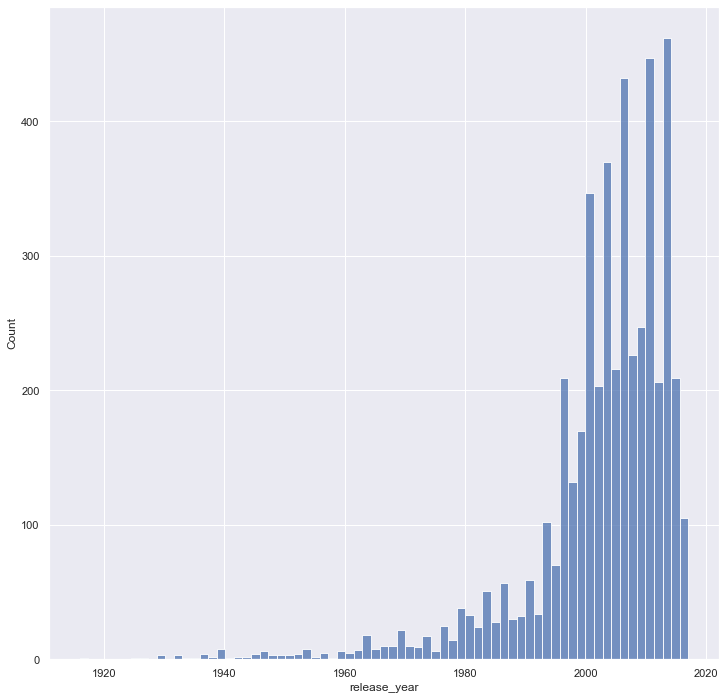

In [21]:
f = plt.subplots(figsize=(12, 12))
sb.histplot(data = year)

### Genre against popularity

            popularity    budget   revenue
popularity    1.000000  0.504032  0.644069
budget        0.504032  1.000000  0.730347
revenue       0.644069  0.730347  1.000000


<AxesSubplot:>

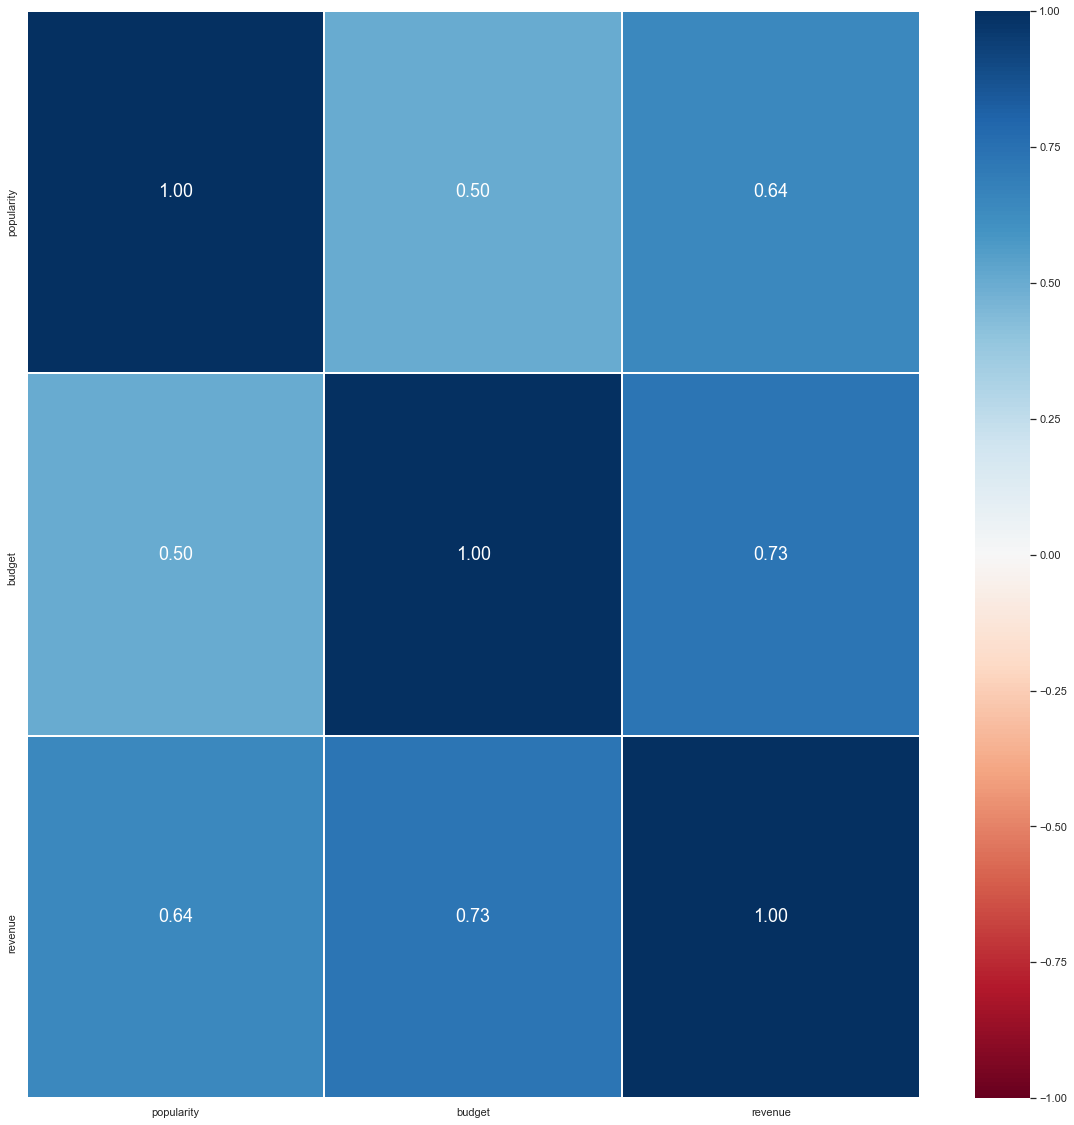

In [22]:
#correlation matrix
popularity_data = pd.DataFrame(movies_clean[["popularity", "budget", "revenue"]])
print(popularity_data.corr())

#heatmap of the matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(popularity_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

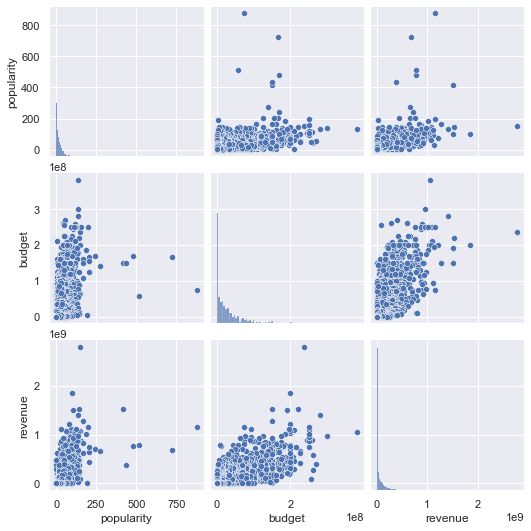

In [23]:
sb.pairplot(data = popularity_data)

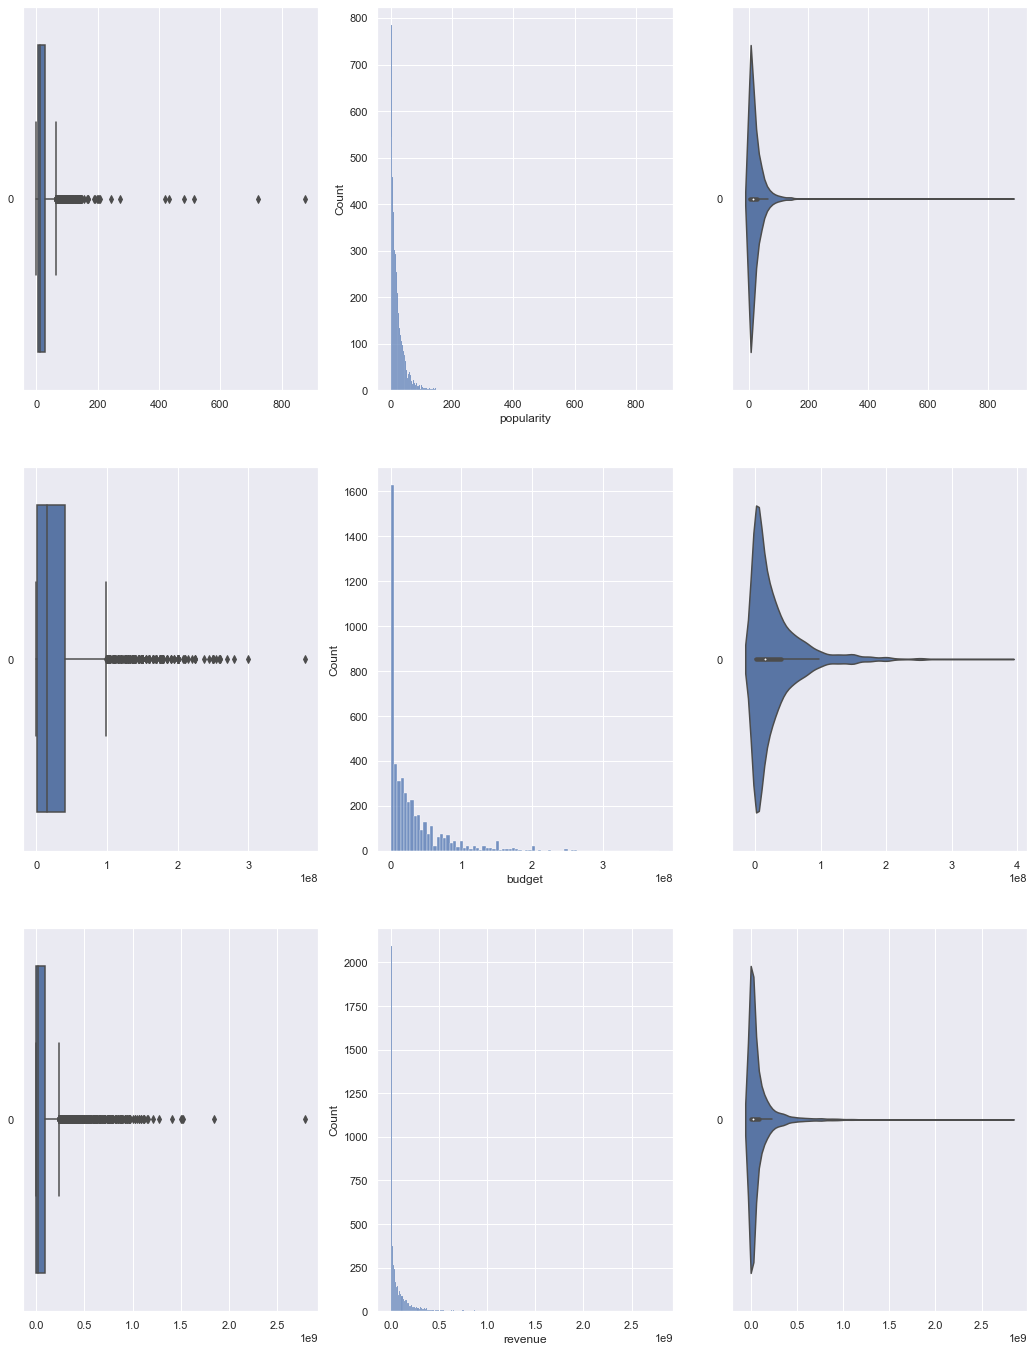

In [24]:
# Draw the distributions of all variables
f, axes = plt.subplots(3, 3, figsize=(18, 24))

count = 0
for var in popularity_data:
    sb.boxplot(data = popularity_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = popularity_data[var], ax = axes[count,1])
    sb.violinplot(data = popularity_data[var], orient = "h", ax = axes[count,2])
    count += 1

### Categorical Data

Categorical variables chosen here would be **genres** and **original language**.

### Genres

Number of Genres : 20
 Drama              1207
 Comedy             1042
 Action              754
 Adventure           339
 Horror              300
 Crime               195
 Thriller            194
 Animation           123
 Fantasy             117
 Romance             106
 Science Fiction      96
 Documentary          89
 Family               56
 Mystery              41
 Music                34
 Western              27
 History              25
 War                  24
 TV Movie              4
 Foreign               2
Name: First_genre, dtype: int64


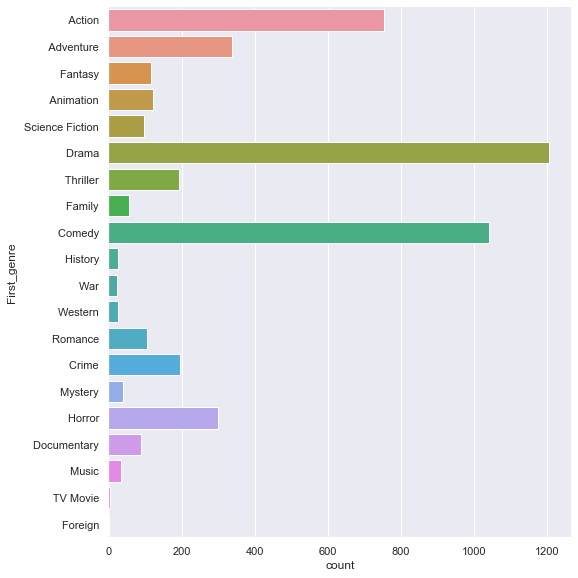

In [25]:
print("Number of Genres :", len(movies_clean["First_genre"].unique()))

genres = pd.value_counts(movies_clean["First_genre"])
print(movies_clean["First_genre"].value_counts())
sb.catplot(y = "First_genre", data = movies_clean, kind = "count", height = 8)

Look at the result, drama is the highest genre produced by movie producer with comedy in the second and action movie as the third. Let us see a histogram plot of genres against release year.

Text(0, 0.5, 'Count')

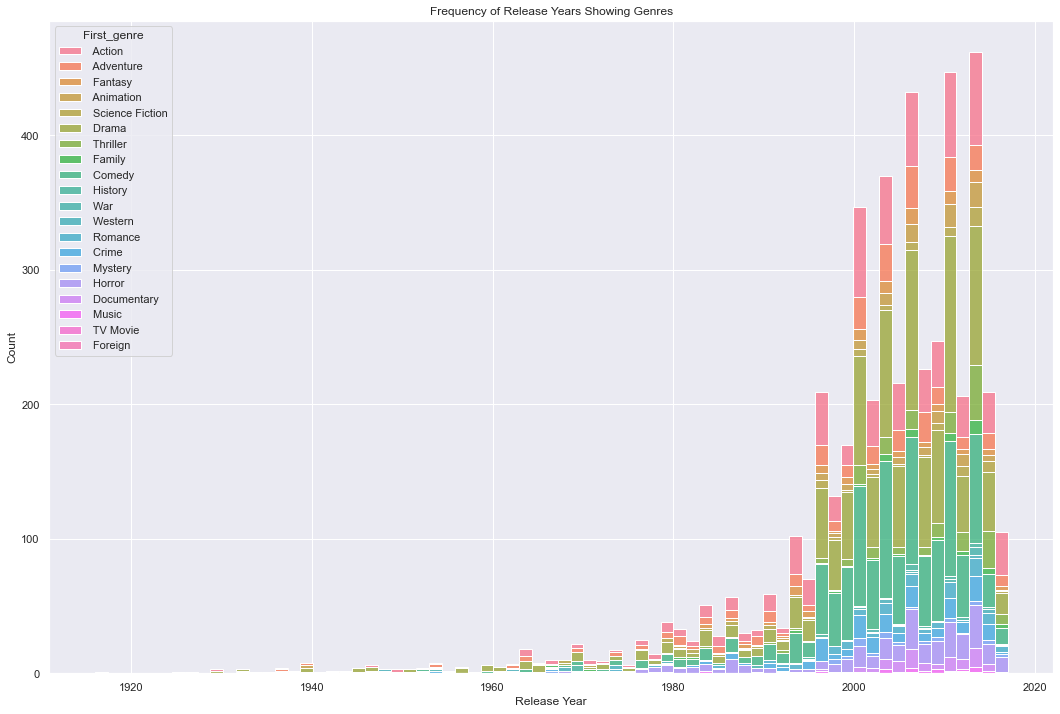

In [26]:
fig, ax = plt.subplots(figsize=(18,12))

sb.histplot(x = 'release_year', hue = 'First_genre', data = movies_clean, multiple = 'stack')
plt.title('Frequency of Release Years Showing Genres')
plt.xlabel('Release Year')
plt.ylabel('Count')

As shown in the graph, **Drama** is the most produced movie genre over years.

### Original language

Number of languages : 37
en    4477
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
nl       4
th       3
he       3
cs       2
ta       2
id       2
ar       2
ro       2
vi       1
hu       1
nb       1
is       1
el       1
pl       1
te       1
xx       1
sl       1
no       1
ky       1
ps       1
tr       1
af       1
Name: original_language, dtype: int64


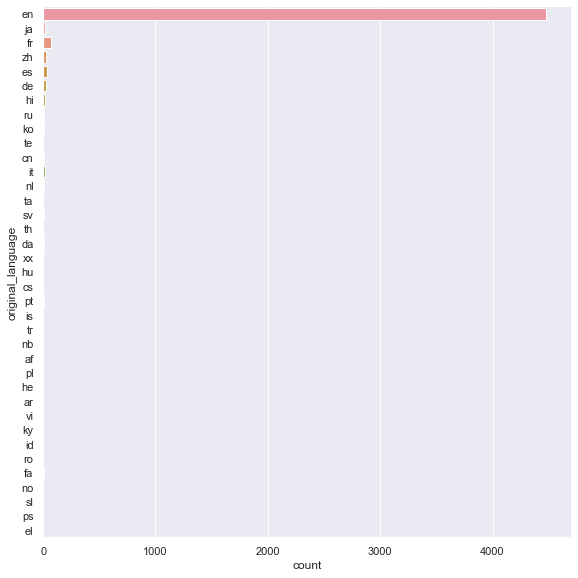

In [27]:
print("Number of languages :", len(movies_clean["original_language"].unique()))

# Pokemons in each Generation
print(movies_clean["original_language"].value_counts())
sb.catplot(y = "original_language", data = movies_clean, kind = "count", height = 8)

Text(0, 0.5, 'Count')

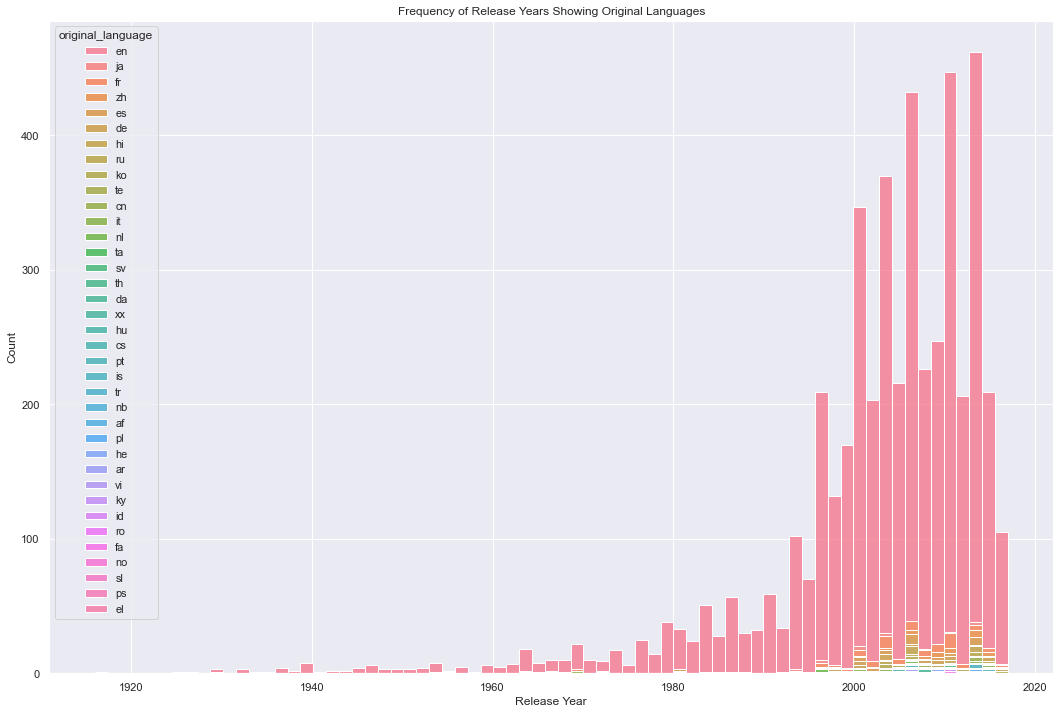

In [28]:
fig, ax = plt.subplots(figsize=(18,12))

sb.histplot(x = 'release_year', hue = 'original_language', data = movies_clean, multiple = 'stack')
plt.title('Frequency of Release Years Showing Original Languages')
plt.xlabel('Release Year')
plt.ylabel('Count')

As shown in the graph, most of the movies use english as their main language.

### Distribution Between Genres and the Original Language

<AxesSubplot:xlabel='First_genre', ylabel='original_language'>

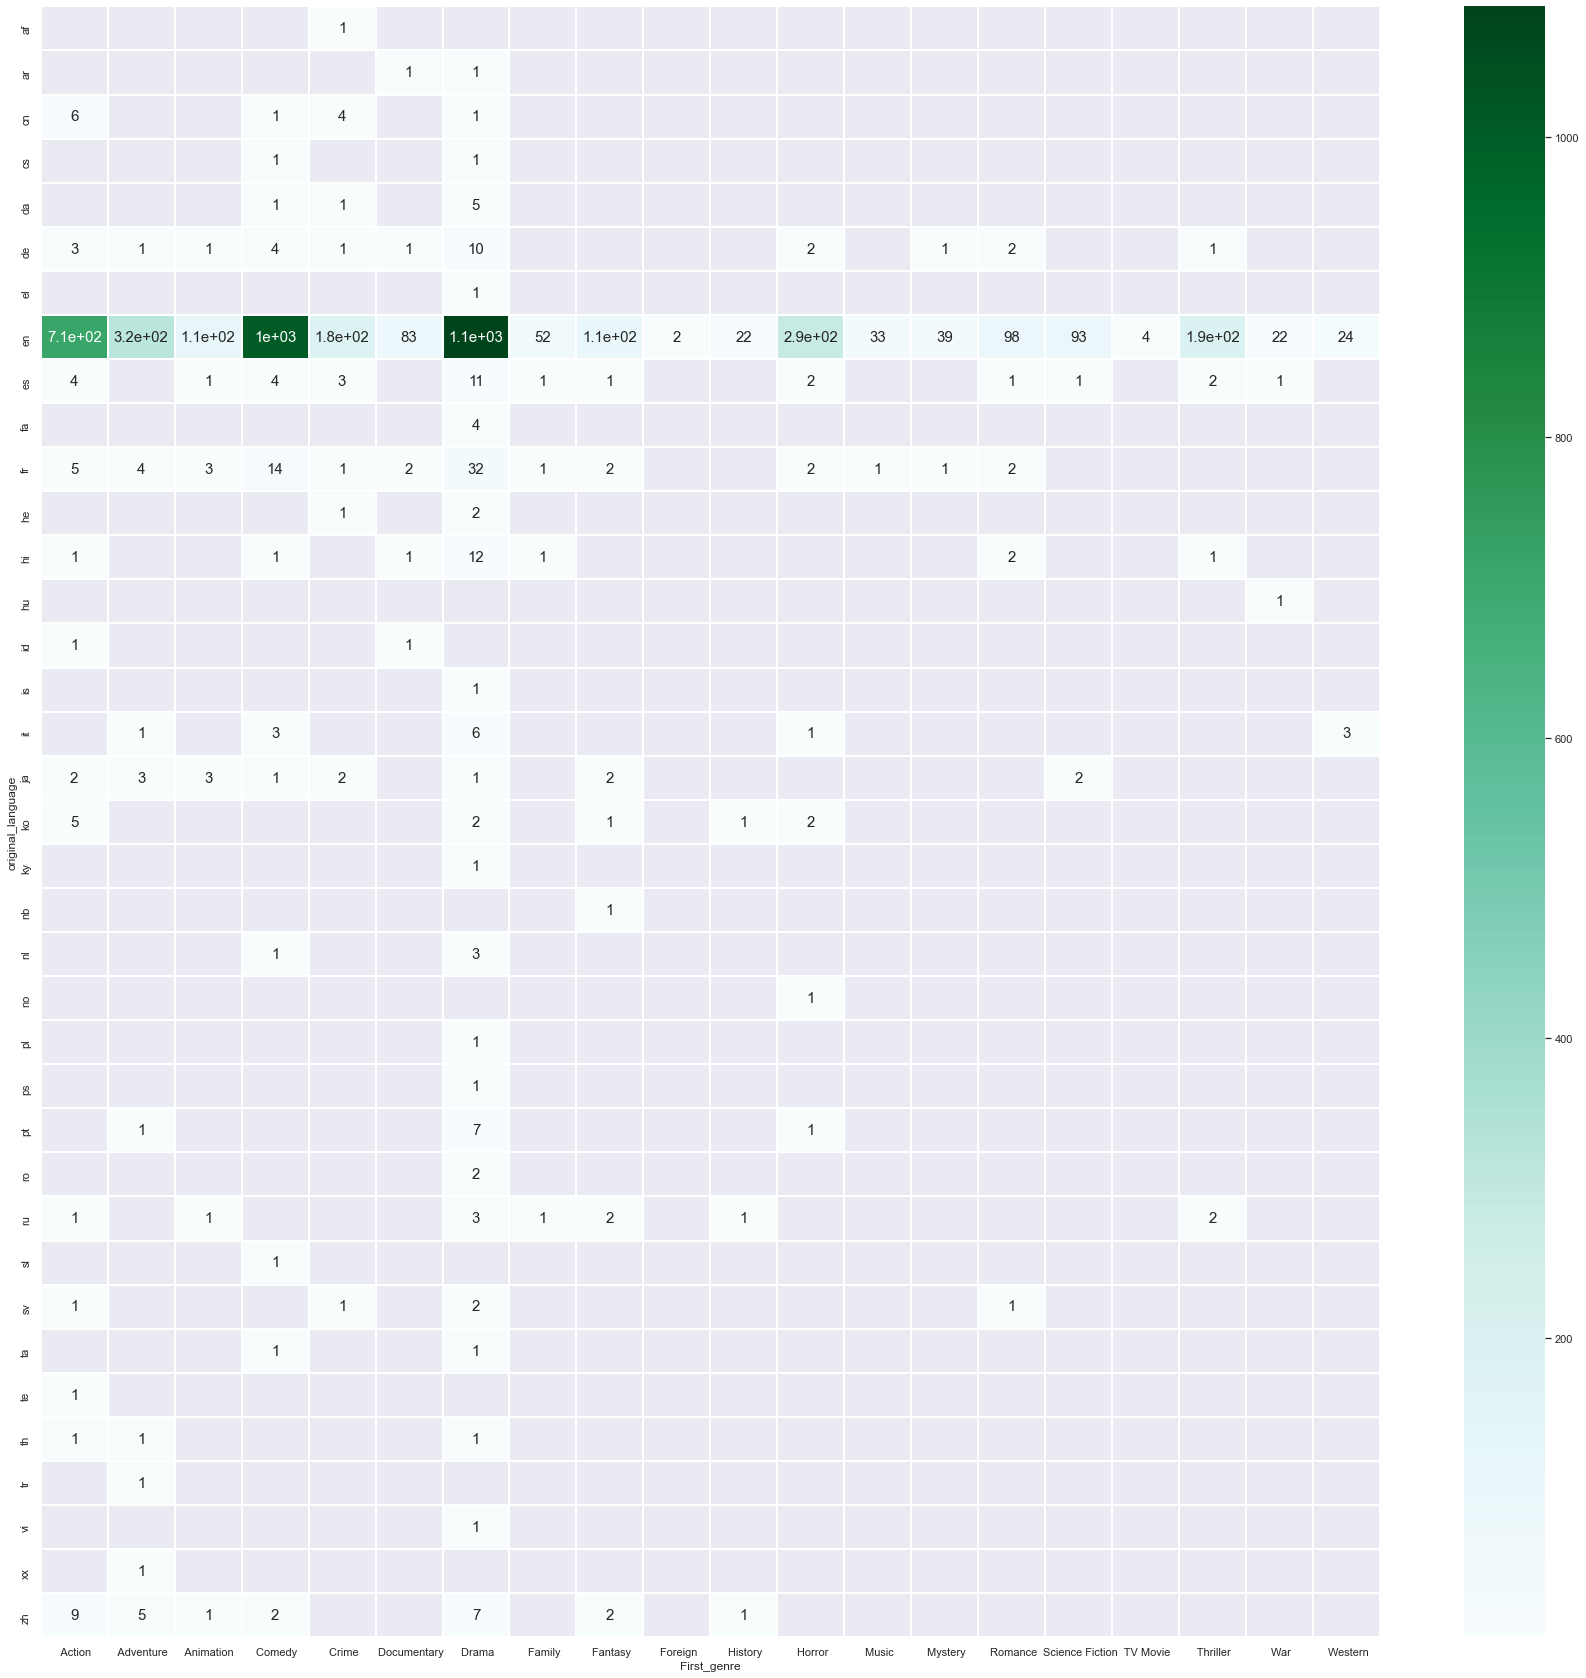

In [29]:
f = plt.figure(figsize=(30, 30))
sb.heatmap(movies_clean.groupby(['original_language', 'First_genre']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 15}, cmap = "BuGn")

## Getting Top 10 Genres from The Dataset

In [30]:
top_genres = pd.DataFrame(genres[:12]).reset_index()
top_genres.columns = ['genres', 'number_of_movies']
top_genres

,genres,number_of_movies
0,Drama,1207
1,Comedy,1042
2,Action,754
3,Adventure,339
4,Horror,300
5,Crime,195
6,Thriller,194
7,Animation,123
8,Fantasy,117
9,Romance,106


C:\Users\anson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'frequency')

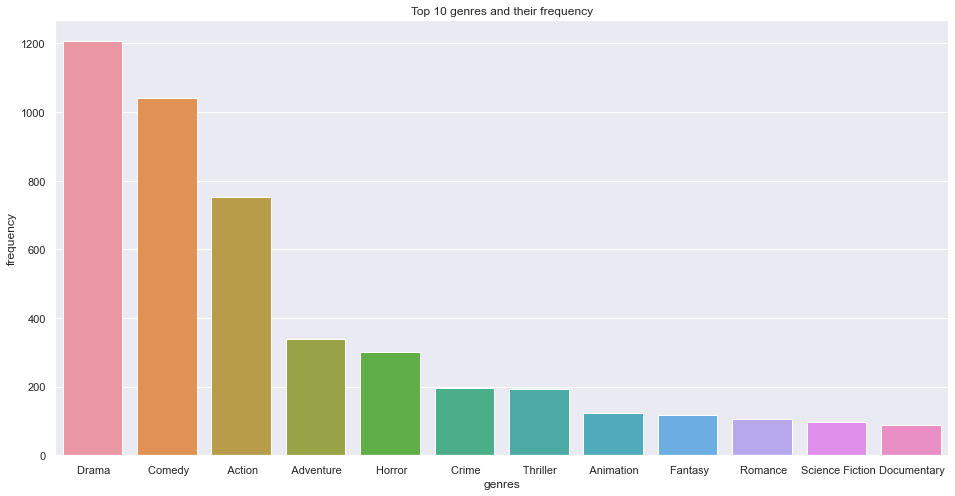

In [31]:
f, axes = plt.subplots(figsize=(16,8))

sb.barplot(top_genres['genres'], top_genres['number_of_movies'])
plt.title('Top 10 genres and their frequency')
plt.xlabel('genres')
plt.ylabel('frequency')

### Cleaning of the "Overview" column to prepare for analysis

Let us look on an example:

In [32]:
movies_clean['overview'][2]

'A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. While M battles political forces to keep the secret service alive, Bond peels back the layers of deceit to reveal the terrible truth behind SPECTRE.'

### Naive Bayas

In [ ]:
cleanup_nums = {"genres": {"Drama": 0, "Comedy": 1, "Action": 2, "Adventure": 3, "Horror": 4, "Crime": 5, "Thriller": 6, "Animation": 7, "Fantasy": 8, "Romance": 9, "Science Fiction": 10, "Documentary": 11}}\


In [ ]:
from sklearn.preprocessing import LabelEncoder
X = movies_clean.iloc[:, 18].values
le = LabelEncoder()
X_encoded = le.fit_transform(X)
print(X_encoded)
y = movies_clean.iloc[:,7].values
z = movies_clean.iloc[:,6].values
z_encoded = le.fit_transform(z)
print(z_encoded)

features = zip(z_encoded, X_encoded)
print(features)
#top_genres = top_genres.replace(cleanup_nums)
#top_genres.head()
                        

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features, X_encoded)

#Predict Output
predicted= model.predict([[0,11]]) # 0:Overcast, 2:Mild
print ("Predicted Value:", predicted)

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

### Logistic Regression

In [ ]:


# Import essential models and functions from sklearn
# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Recall the Total-HP Dataset
popularity = pd.DataFrame(movies_clean['popularity'])  # Response
genre = top_genres.replace(['Drama', 'Comedy', 'Action', 'Adventure', 'Horror', 'Crime', 'Thriller', 'Animation', 'Fantasy', 'Romance', 'Science Fiction', 'Documentary'],
                        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], inplace=True) #predictor
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(genre, popularity, test_size = 0.25)
y_train = np.ravel(y_train)

# Logistic Regression using Train Data
logreg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')         # create the linear regression object
logreg.fit(X_train, y_train)        # train the logistic regression model



In [ ]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', logreg.intercept_)
print('Coefficients of Regression \t: a = ', logreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", logreg.score(X_train, y_train))
print("Accuracy Score \t:", accuracy_score(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", logreg.score(X_test, y_test))
print("Accuracy Score \t:", accuracy_score(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()
